In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
url = 'https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv'
df = pd.read_csv(url)

ЗАДАНИЕ 1

Задача 1

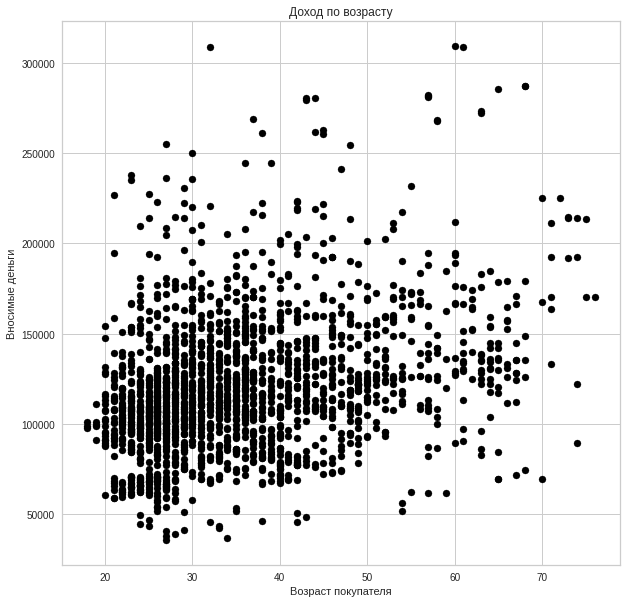

In [ ]:
# 1)
x = list(df['Age'])
y = list(df['Income'])
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c = 'black')
plt.title("Доход по возрасту")
plt.xlabel("Возраст покупателя")
plt.ylabel("Вносимые деньги")
plt.show()

Из графика видно, что:
  1) Не видно зависимости дохода от возраста
  2) Большая часть покупателей - люди до 45 лет

Задача 2

<Figure size 720x432 with 0 Axes>

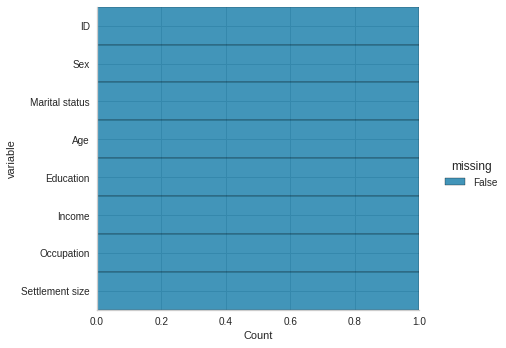

In [ ]:
# 2)

import seaborn as sns


plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

На графике видно, что пустые значения отсутствуют

Задача 3

<function matplotlib.pyplot.show(*args, **kw)>

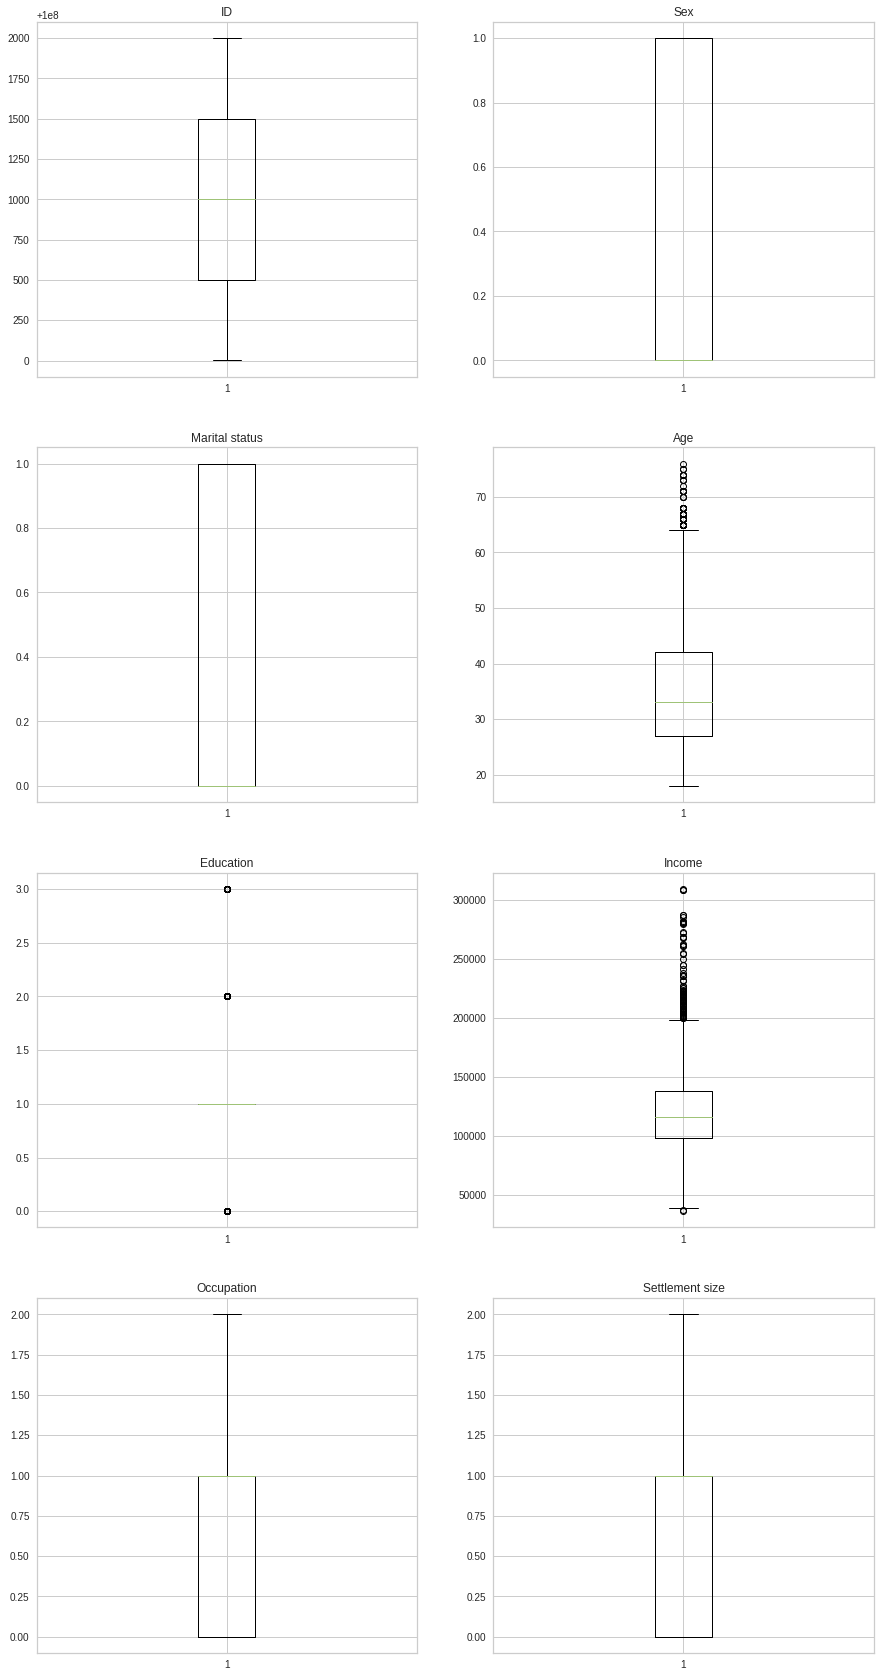

In [ ]:
# 3)

plt.figure(figsize = (15, 30))
plt.subplot(4, 2, 1)
plt.boxplot(df['ID'])
plt.title('ID')
plt.subplot(4, 2, 2)
plt.boxplot(df['Sex'])
plt.title('Sex')
plt.subplot(4, 2, 3)
plt.boxplot(df['Marital status'])
plt.title('Marital status')
plt.subplot(4, 2, 4)
plt.boxplot(df['Age'])
plt.title('Age')
plt.subplot(4, 2, 5)
plt.boxplot(df['Education'])
plt.title('Education')
plt.subplot(4, 2, 6)
plt.boxplot(df['Income'])
plt.title('Income')
plt.subplot(4, 2, 7)
plt.boxplot(df['Occupation'])
plt.title('Occupation')
plt.subplot(4, 2, 8)
plt.boxplot(df['Settlement size'])
plt.title('Settlement size')
plt.show

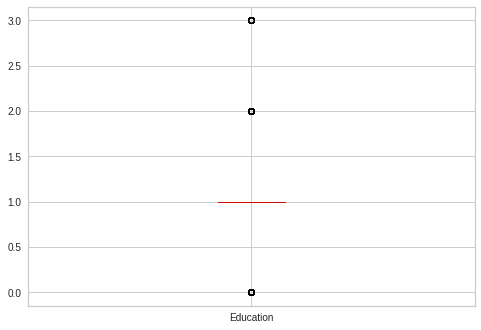

In [4]:
df['Education'].plot(kind='box')

На графиках можно увидеть следующие выбивающиеся группы:
  1) Людей, зарабатывающих менее 30 000 (рублей? долларов? тенге?)
  2) Людей, зарабатывающих более 200 000
  3) Пожилых людей старше 63-64 лет

Задача 4

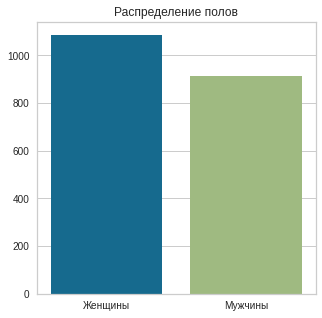

In [25]:
# 4)

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
#df.Sex.value_counts()
sns.barplot(data = df, x = ['Женщины', 'Мужчины'] , y = [df.Sex.value_counts()[0], df.Sex.value_counts()[1]])
ax.set_title("Распределение полов")
plt.show()

Из графика видно неравенство полоа по доходу

Задача 5

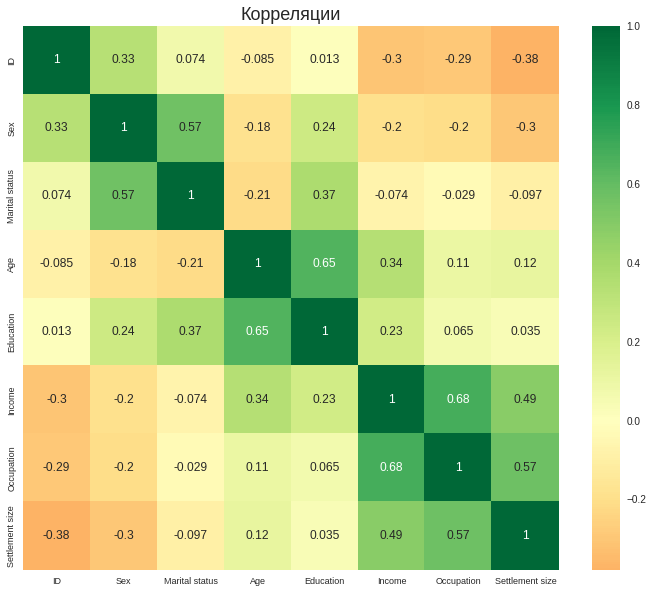

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляции', fontsize=18)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

Сильнее всего коррелируют доход и профессия,  пол и семейный статус, возраст и образование

ЗАДАНИЕ 2

Задача 1

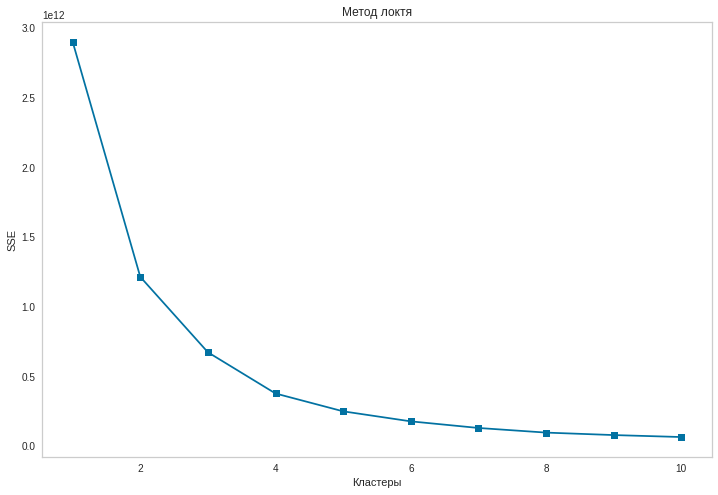

In [19]:
# ID нам не нужен и будет только мешать, поскольку по признаку ID делить кого-то бессмысленно, так как это просто номер.

bow = df.loc[:, ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]

SSE = []
plt.figure(figsize=(12, 8))
plt.grid()
plt.title("Метод локтя")
for i in range(1, 11):
  bus = KMeans(i)
  bus.fit(bow)
  SSE.append(bus.inertia_)
plt.plot(range(1, 11), SSE, marker = 's')
plt.xlabel("Кластеры")
plt.ylabel("SSE")
plt.show()

По этому графику трудно определить оптимальное количество кластеров

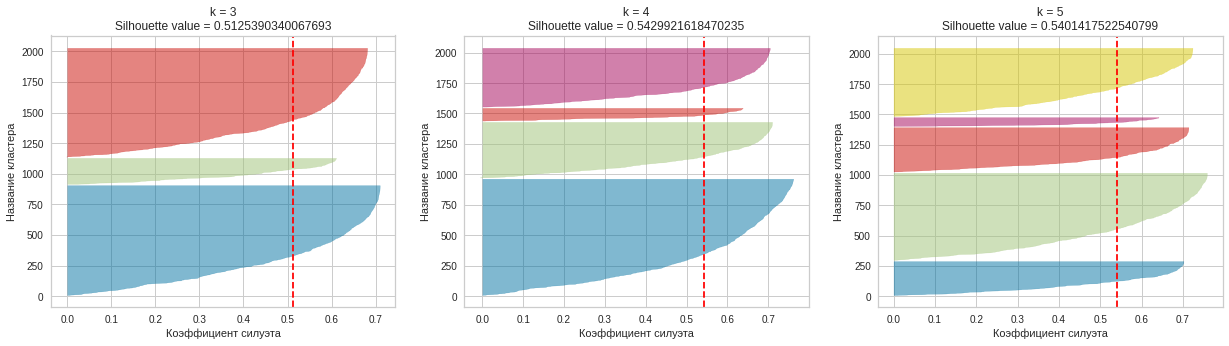

In [20]:
#Метод силуэтов

fig, ax = plt.subplots(1, 3, figsize=(21, 5))
for i in range(3, 6):
  bus = KMeans(i)
  bus.fit(bow.values)
  ax[i-3].set_title(f'k = {i}\nSilhouette value = {silhouette_score(bow.values, bus.predict(bow.values), metric="euclidean")}')
  ax[i-3].set_xlabel("Коэффициент силуэта")
  ax[i-3].set_ylabel("Название кластера")
  visualizer = SilhouetteVisualizer(bus, colors='yellowbrick', ax = ax[i-3])
  visualizer.fit(bow.values)

Оптимальное кол-во кластеров - 3

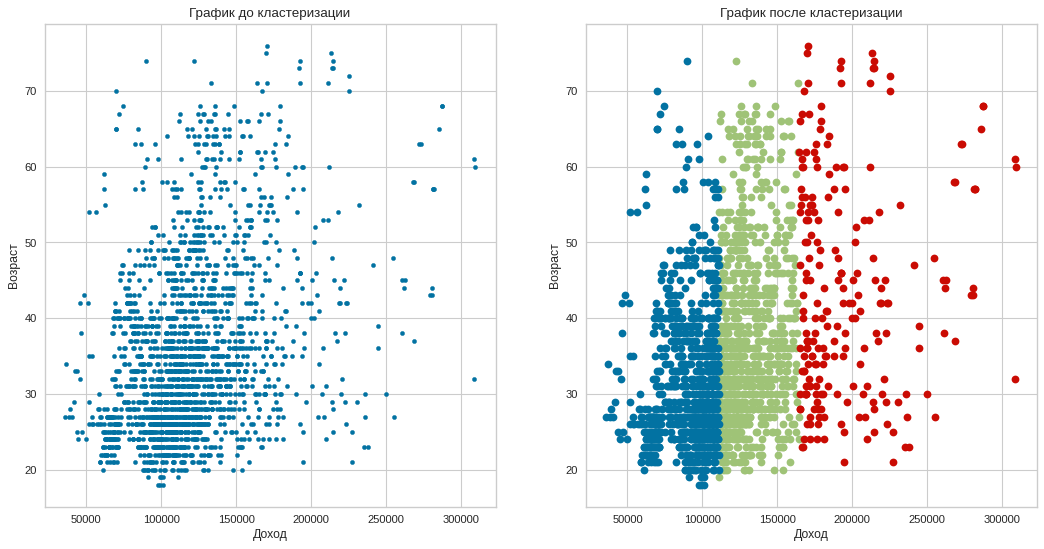

In [36]:
#2

bus = KMeans(3)
bus.fit(df)
dfcl = pd.concat([df, pd.DataFrame(bus.predict(df), columns = ["pred"])], axis = 1)

fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=80)
ax[0].scatter(df['Income'], df['Age'], s=15)
ax[0].set_title("График до кластеризации")
ax[0].set_ylabel("Возраст")
ax[0].set_xlabel("Доход")

ax[1].plot(dfcl[dfcl["pred"] == 0]['Income'], dfcl[dfcl["pred"] == 0]['Age'], 'go')
ax[1].plot(dfcl[dfcl["pred"] == 1]['Income'], dfcl[dfcl["pred"] == 1]['Age'], 'ro')
ax[1].plot(dfcl[dfcl["pred"] == 2]['Income'], dfcl[dfcl["pred"] == 2]['Age'], 'bo')
ax[1].set_title("График после кластеризации")
ax[1].set_ylabel("Возраст")
ax[1].set_xlabel("Доход")

plt.show()


Разделение на кластеры в большей степени был произведен по возрасту

ЗАДАНИЕ 3

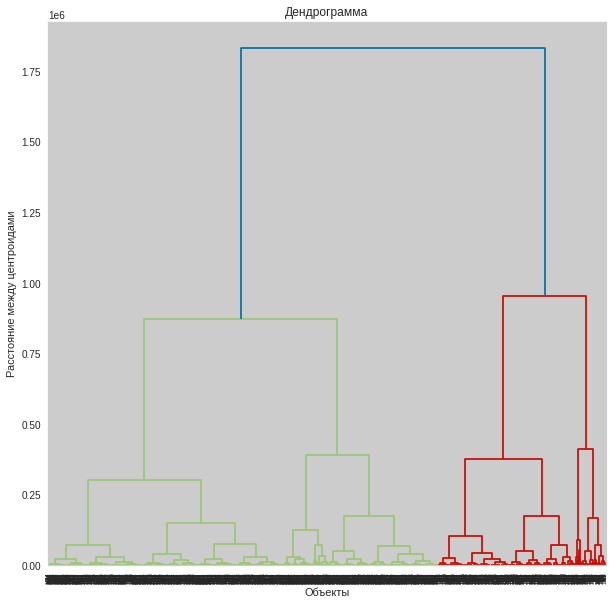

In [34]:
#1

a = linkage(bow, 'ward')

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(a)
plt.title("Дендрограмма")
plt.xlabel("Объекты")
plt.ylabel("Расстояние между центроидами")
plt.show()

Оптимальное кол-во кластеров от 2 до 4

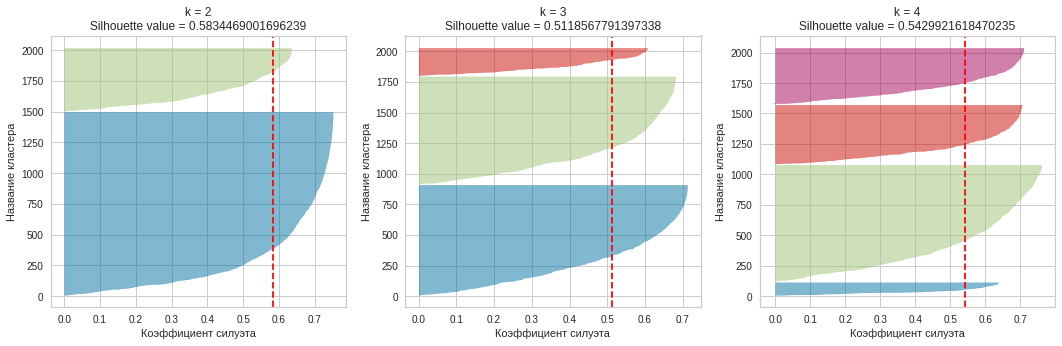

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i in range(2, 5):
  bus = KMeans(i)
  bus.fit(bow.values)
  ax[i-2].set_title(f'k = {i}\nSilhouette value = {silhouette_score(bow.values, bus.predict(bow.values), metric="euclidean")}')
  ax[i-2].set_xlabel("Коэффициент силуэта")
  ax[i-2].set_ylabel("Название кластера")
  visualizer = SilhouetteVisualizer(bus, colors='yellowbrick', ax = ax[i-2])
  visualizer.fit(bow.values)

Оптимальное количество кластеров снова 3

Text(0, 0.5, 'Доход')

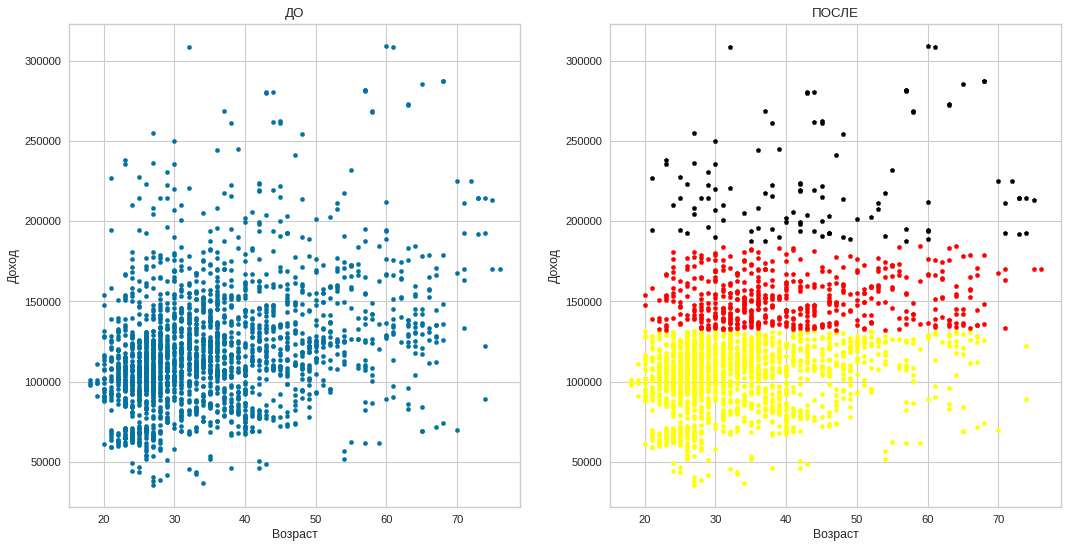

In [29]:
label = fcluster(a, 3, criterion = 'maxclust')
bow['pred'] = label
fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi = 80)
ax[0].scatter(bow['Age'], bow['Income'], s = 15)
ax[0].set_title('ДО')
ax[0].set_xlabel('Возраст')
ax[0].set_ylabel('Доход')

ax[1].scatter(bow.loc[label == 3, 'Age'], bow.loc[label == 3, 'Income'], s = 20, marker = 'p', color = 'black')
ax[1].scatter(bow.loc[label == 1, 'Age'], bow.loc[label == 1, 'Income'], s = 20, marker = 'p', color = 'yellow')
ax[1].scatter(bow.loc[label == 2, 'Age'], bow.loc[label == 2, 'Income'], s = 20, marker = 'p', color = 'red')
ax[1].set_title("ПОСЛЕ")
ax[1].set_xlabel("Возраст")
ax[1].set_ylabel("Доход")

Объекты разделены на кластеры примерно так же, как с помощью KMeans.